### Data Preparation

In [2]:
import pandas as pd
import numpy as np
from reservoirpy.datasets import mackey_glass
import matplotlib.pyplot as plt

In [3]:
timesteps = 2510
tau = 17
X = mackey_glass(timesteps, tau=tau)

# rescale between -1 and 1
X = 2 * (X - X.min()) / (X.max() - X.min()) - 1

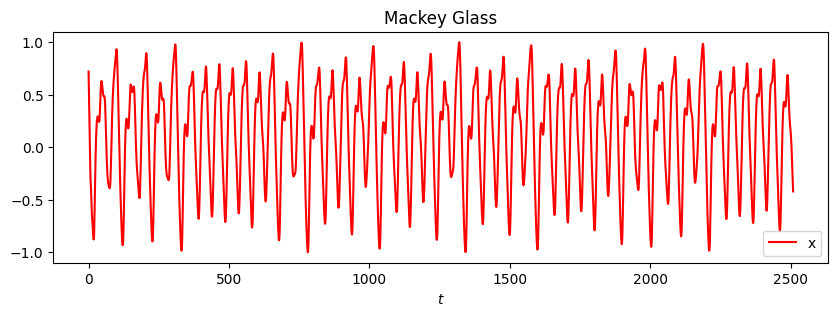

In [4]:
plt.figure(figsize=(10, 3))
plt.title("Mackey Glass")
plt.xlabel("$t$")
plt.plot(X, label="x", color="red")
#plt.plot(X[:, 1], label="y", color="indigo")
#plt.plot(X[:, 2], label="z", color="blue")
plt.legend()
plt.show()

In [9]:
data_array = X

### Reservoir model

При инициализации объекта класса ESNPredictions можно выбрать: размер окна, используемого для генерации предсказаний(window_size), количество шагов предсказания(forecast_size), размер тестовой выборки(test_size) \
При вызове функции get_predictions можно указать параметр отвечающий за оптимизацию гиперпараметров модели(opt)

In [11]:
%%capture

from models.esn import ESNPredictions

esn_preds_simple = ESNPredictions(data_array, window_size=50, forecast_size=10, test_size=0.1, model_type='simple')
Y_pred_simple = esn_preds_simple .get_predictions(opt=False)
Y_test_simple = esn_preds_simple .Y_test[:, 0][:len(Y_pred_simple)]

In [12]:
%%capture

esn_preds_deep = ESNPredictions(data_array, window_size=50, forecast_size=10, test_size=0.1, model_type='deep')
Y_pred_deep = esn_preds_deep.get_predictions(opt=False)
Y_test_deep = esn_preds_deep.Y_test[:, 0][:len(Y_pred_deep)]

In [13]:
%%capture

esn_preds_hier = ESNPredictions(data_array, window_size=50, forecast_size=10, test_size=0.1, model_type='hierarchical')
Y_pred_hier = esn_preds_hier.get_predictions(opt=False)
Y_test_hier = esn_preds_hier.Y_test[:, 0][:len(Y_pred_hier)]

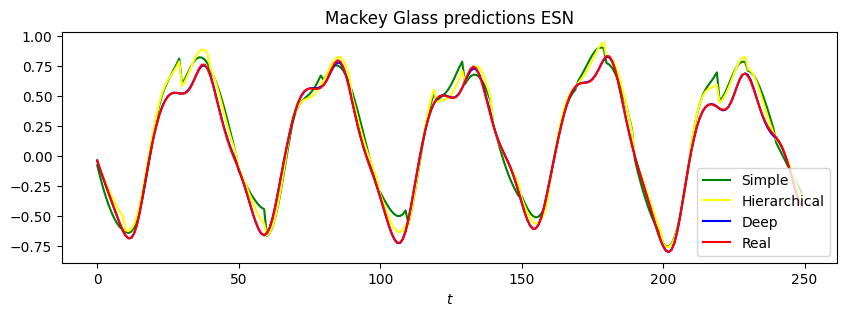

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Mackey Glass predictions ESN")
plt.xlabel("$t$")
plt.plot(Y_pred_simple, label="Simple", color="green")
plt.plot(Y_pred_hier, label="Hierarchical", color="yellow")
plt.plot(Y_pred_deep, label="Deep", color="blue")
plt.plot(Y_test_simple, label="Real", color="red")
plt.legend()
plt.show()

In [16]:
from sklearn import metrics

mae_simple = metrics.mean_absolute_error(Y_test_simple, Y_pred_simple[:len(Y_test_simple)])
mae_deep = metrics.mean_absolute_error(Y_test_deep, Y_pred_deep[:len(Y_test_deep)])
mae_hier = metrics.mean_absolute_error(Y_test_hier, Y_pred_hier[:len(Y_test_hier)])
print('MAE для simple ESN модели:', mae_simple)
print('MAE для deep ESN модели:', mae_deep)
print('MAE для hier ESN модели:', mae_hier)

MAE для simple ESN модели: 0.08222191787246928
MAE для deep ESN модели: 0.004229046806313241
MAE для hier ESN модели: 0.06919913009894708


### Arima
При инициализации объекта класса Arimaredictions можно выбрать: количество шагов предсказания(forecast_size), размер тестовой выборки(test_size) \
При вызове функции get_predictions можно указать параметр отвечающий за оптимизацию гиперпараметров модели(opt)

In [18]:
%%capture
from models.arima import ArimaPredictions

arima = ArimaPredictions(data_array, forecast_size=10, test_size=0.1)
Y_pred_arima = arima.get_predictions(opt=False)
Y_test_arima = arima.Y_test[:len(Y_pred_arima)]

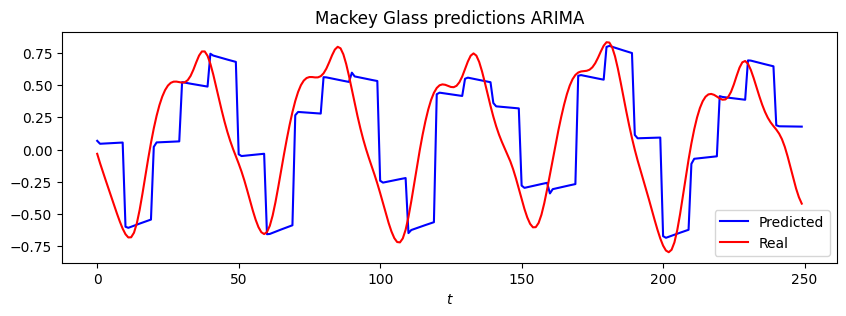

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Mackey Glass predictions ARIMA")
plt.xlabel("$t$")
#plt.plot(Y_train, label="Predicted stocks", color="red")
plt.plot(Y_pred_arima, label="Predicted", color="blue")
plt.plot(Y_test_arima, label="Real", color="red")
plt.legend()
plt.show()

In [20]:
mae = metrics.mean_absolute_error(Y_test_arima, Y_pred_arima)
print('MAE для Arima модели:', mae)

MAE для Arima модели: 0.3018412693442208


### LSTM

In [21]:
%%capture
from models.lstm import LSTMPredictions

lstm = LSTMPredictions(data_array, window_size=50, forecast_size=10, test_size=0.1)
Y_pred_lstm = lstm.get_predictions(opt=False)
Y_test_lstm = lstm.Y_test_one_dim[:len(Y_pred_lstm)]

2023-12-22 16:57:45.234427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


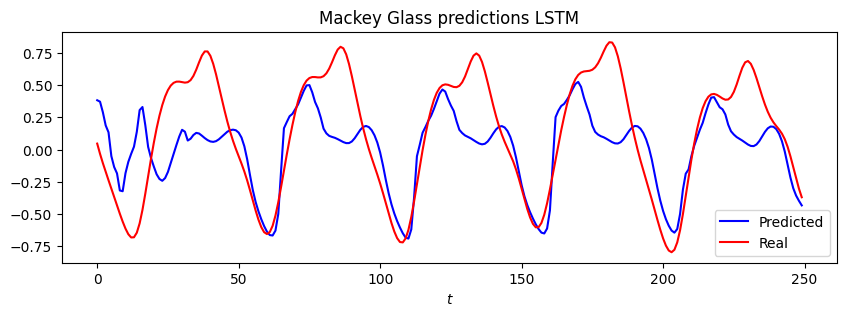

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Mackey Glass predictions LSTM")
plt.xlabel("$t$")
#plt.plot(Y_train, label="Predicted stocks", color="red")
plt.plot(Y_pred_lstm, label="Predicted", color="blue")
plt.plot(Y_test_lstm, label="Real", color="red")
plt.legend()
plt.show()

In [23]:
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test_lstm, Y_pred_lstm)
print('MAE для LSTM модели:', mae)

MAE для LSTM модели: 0.2693408823019747


### GRU

In [26]:
%%capture
from models.gru import GRUPredictions

gru = GRUPredictions(data_array, window_size=100, forecast_size=3, test_size=0.1)
Y_pred_gru = gru.get_predictions(opt=False)
Y_test_gru = gru.Y_test_one_dim[:len(Y_pred_gru)]

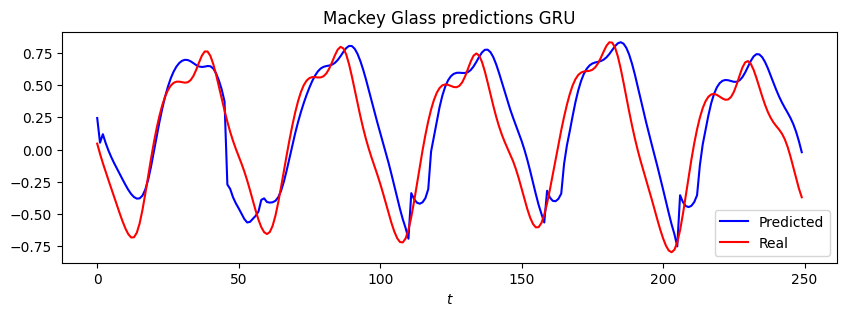

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.title("Mackey Glass predictions GRU")
plt.xlabel("$t$")

plt.plot(Y_pred_gru, label="Predicted", color="blue")
plt.plot(Y_test_gru, label="Real", color="red")
plt.legend()
plt.show()

In [28]:
from sklearn import metrics
mae = metrics.mean_absolute_error(Y_test_gru, Y_pred_gru)
print('MAE для GRU модели:', mae)

MAE для GRU модели: 0.2103623660120022


### All predictions

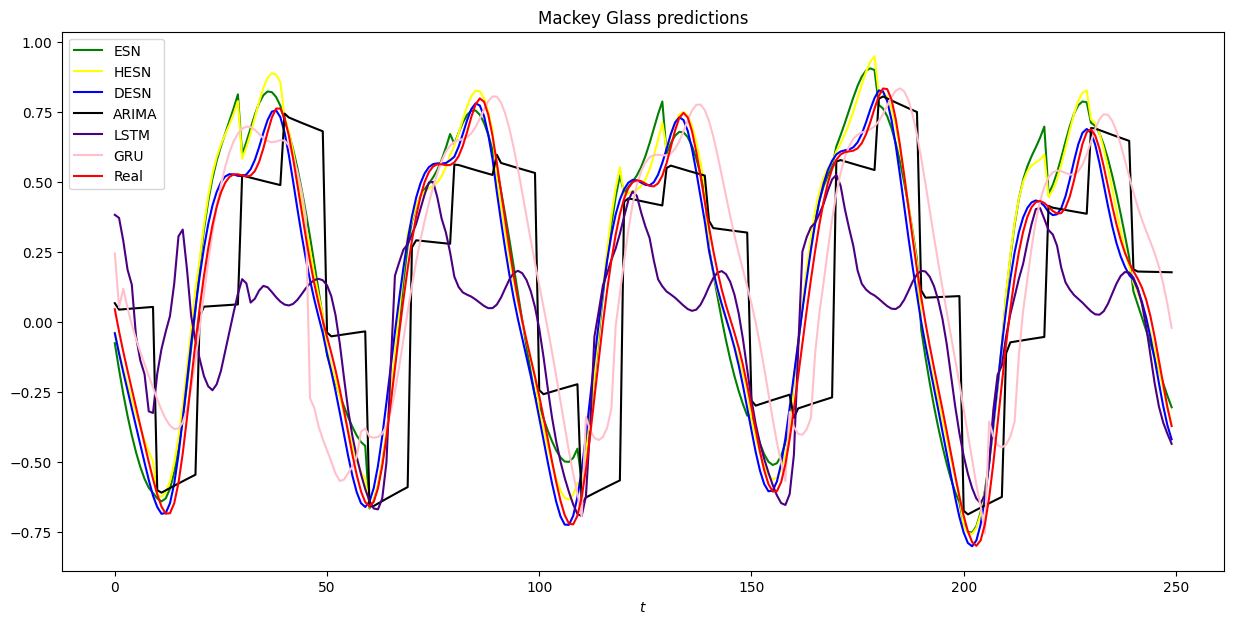

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.title("Mackey Glass predictions")
plt.xlabel("$t$")
plt.plot(Y_pred_simple, label="ESN", color="green")
plt.plot(Y_pred_hier, label="HESN", color="yellow")
plt.plot(Y_pred_deep, label="DESN", color="blue")
plt.plot(Y_pred_arima, label="ARIMA", color="black")
plt.plot(Y_pred_lstm, label="LSTM", color="indigo")
plt.plot(Y_pred_gru, label="GRU", color="pink")
plt.plot(Y_test_gru, label="Real", color="red")
plt.legend()
plt.show()